In [116]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [118]:

train_X = np.load("train_images.npy")
train_Y = np.load("train_labels.npy")
test_images = np.load("test_images.npy")
test_labels = np.load("test_labels.npy")
train_X = train_X.reshape(train_X.shape[0], -1).T / 255.0   # (784, N)
train_Y = train_Y.reshape(1, -1)                            # (1, N)

In [119]:

def init_para(input_size=784, hidden_size=128, output_size=10):
    W1 = np.random.randn(hidden_size, input_size) * 0.01
    B1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * 0.01
    B2 = np.zeros((output_size, 1))
    return W1, B1, W2, B2

def ReLU(X):
    return np.maximum(X, 0)

def softmax(Z):
    Z_shift = Z - np.max(Z, axis=0, keepdims=True)
    expZ = np.exp(Z_shift)
    return expZ / np.sum(expZ, axis=0, keepdims=True)

def Forward_p(W1, B1, W2, B2, X):
    Z1 = W1.dot(X) + B1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + B2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def pre_on_Y(Y, num_classes=10):
    one_hot = np.zeros((num_classes, Y.size))
    one_hot[Y, np.arange(Y.size)] = 1
    return one_hot

def Back_p(W1, W2, B1, B2, X, Z1, Z2, A2, A1, Y):
    m = Y.size
    Y_pre = pre_on_Y(Y, A2.shape[0])
    dZ2 = A2 - Y_pre
    dW2 = (1/m) * dZ2.dot(A1.T)
    dB2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * (Z1 > 0)
    dW1 = (1/m) * dZ1.dot(X.T)
    dB1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, dB1, dW2, dB2

def Get_p(A2):
    return np.argmax(A2, axis=0)

def get_acc(pred, Y):
    return np.mean(pred == Y)

def Update_p(W1, B1, W2, B2, dW1, dB1, dW2, dB2, lr):
    W1 -= lr * dW1
    B1 -= lr * dB1
    W2 -= lr * dW2
    B2 -= lr * dB2
    return W1, B1, W2, B2

def compute_loss(A2, Y):
    m = Y.size
    Y_onehot = pre_on_Y(Y, A2.shape[0])
    log_probs = np.log(A2 + 1e-8)
    loss = -np.sum(Y_onehot * log_probs) / m
    return loss

def GD(X, Y, lr, iters):
    W1, B1, W2, B2 = init_para()

    for i in range(iters):
        Z1, A1, Z2, A2 = Forward_p(W1, B1, W2, B2, X)
        dW1, dB1, dW2, dB2 = Back_p(W1, W2, B1, B2, X, Z1, Z2, A2, A1, Y)
        W1, B1, W2, B2 = Update_p(W1, B1, W2, B2, dW1, dB1, dW2, dB2, lr)

        if i % 20 == 0:
            pred = Get_p(A2)
            acc = get_acc(pred, Y)
            loss = compute_loss(A2, Y)
            print(f"Iteration {i}: Accuracy = {acc:.4f}, Loss = {loss:.4f}")

    return W1, B1, W2, B2


In [122]:
W1,B1,W2,B2 = GD(train_X,train_Y,0.1,100)

Iteration 0: Accuracy = 0.0997, Loss = 2.3026
Iteration 20: Accuracy = 0.5416, Loss = 2.2692
Iteration 40: Accuracy = 0.5016, Loss = 2.1350
Iteration 60: Accuracy = 0.6465, Loss = 1.7461
Iteration 80: Accuracy = 0.7348, Loss = 1.2488


In [124]:
test_X = test_images.reshape(test_images.shape[0], -1).T / 255.0
test_Y = test_labels.reshape(1, -1)

def evaluate_single_sample(X, Y, W1, B1, W2, B2, index=None):
    if index is None:
        index = np.random.randint(0, X.shape[1])
    
    # Prepare the input (column vector)
    x_sample = X[:, index].reshape(-1, 1)
    y_true = Y[0, index]

    # Forward pass
    Z1, A1, Z2, A2 = Forward_p(W1, B1, W2, B2, x_sample)

    # Predicted label
    y_pred = np.argmax(A2, axis=0)[0]

    # Print result
    print(f"Predicted label: {y_pred}")
    print(f"Actual label: {y_true}")

    # Visualize the image
    plt.imshow(x_sample.reshape(28,28), cmap='gray')
    plt.title(f"True: {y_true} | Predicted: {y_pred}")
    plt.axis('off')
    plt.show()

    # Optional: show softmax probabilities
    print("Softmax probabilities:", np.round(A2.flatten(), 3))

Predicted label: 9
Actual label: 9


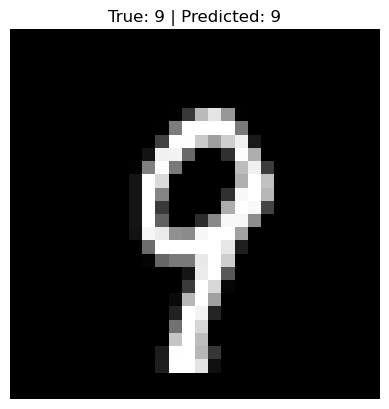

Softmax probabilities: [0.003 0.012 0.013 0.009 0.224 0.024 0.016 0.247 0.064 0.388]


In [136]:
evaluate_single_sample(test_X, test_Y, W1, B1, W2, B2)